In [157]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y=True)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

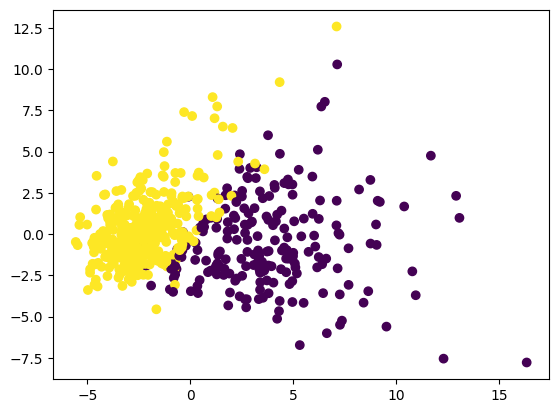

In [158]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

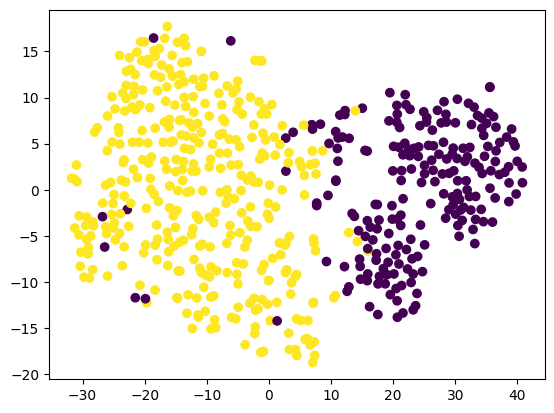

In [165]:
tsne = TSNE(n_components=2, perplexity=30)
X_tsne= tsne.fit_transform(X_norm)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

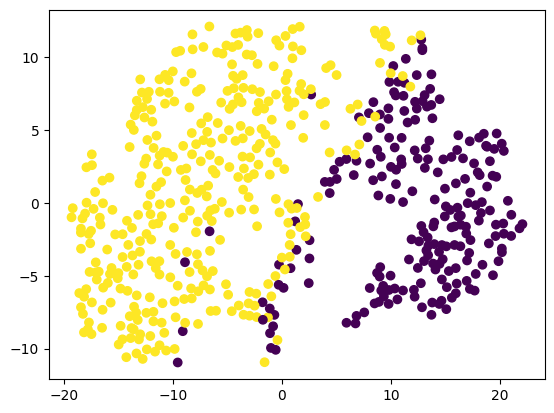

In [168]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
tsne = TSNE(n_components=2, perplexity=55)
X_tsne= tsne.fit_transform(X_pca)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

In [125]:
from sklearn.datasets import fetch_olivetti_faces
X, y = fetch_olivetti_faces(return_X_y=True)
X.shape, y.shape

((400, 4096), (400,))

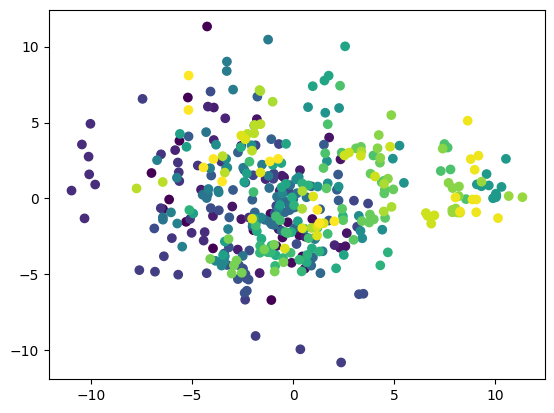

In [127]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

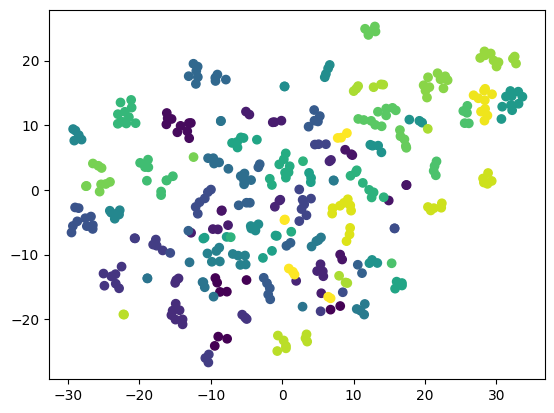

In [154]:
tsne = TSNE(n_components=2, n_iter=1000)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

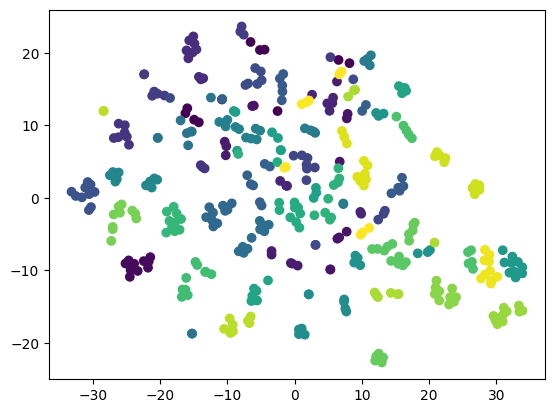

In [130]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_pca)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

In [140]:
import numpy as np
perplexities = np.arange(5, 80, 10)
divergences = []
for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p)
    reduced = tsne.fit_transform(X_pca)
    divergences.append(tsne.kl_divergence_)
print(divergences)

[0.4000631272792816, 0.5702309012413025, 0.5341411232948303, 0.5051293969154358, 0.5076229572296143, 0.4676307439804077, 0.4520105719566345, 0.4993225932121277]


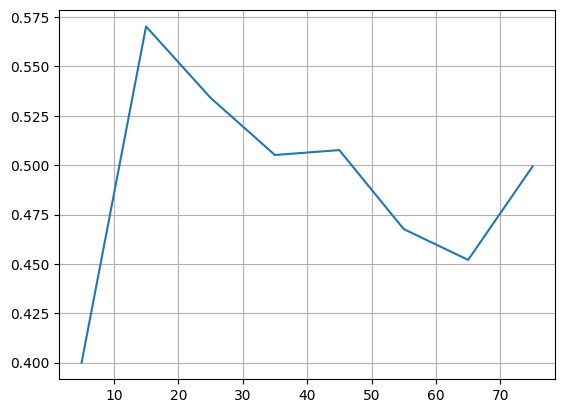

In [144]:
plt.plot(perplexities, divergences)
plt.grid()

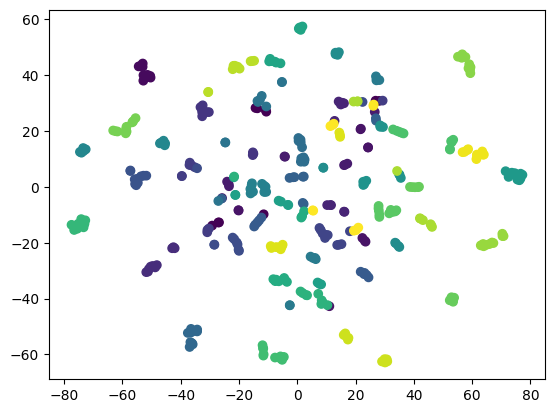

In [142]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X_pca)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

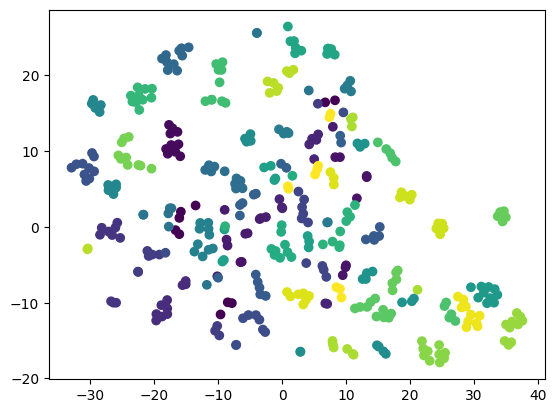

In [155]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
tsne = TSNE(n_components=2, n_iter=5000)
X_tsne = tsne.fit_transform(X_pca)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)